In [1]:
import os
import pandas as pd
from tensorflow.keras.models import load_model, save_model


# Set pandas options to display all rows
pd.set_option('display.max_rows', 220)

/home/mke37/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-08-24 21:16:47.240545: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 21:16:47.424715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 21:16:47.424777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 21:16:47.464484: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
202

In [2]:
L = [] # Word
N = [] # Label

with open("../../../Dataset/TrainingG_Data.txt", 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if line.strip():  # Check if the line is not empty
            parts = line.split()
            if len(parts) == 2:  # Ensure the line contains exactly two parts
                label, word = parts
                L.append(word)
                N.append(label)


In [3]:
series = pd.Series(N)

counts = series.value_counts()
r=counts[:171]
all_labels = r.index.tolist()

# Now you have the values where the count is between 30-40
print(len(all_labels))
# counts

171


In [4]:
len(counts)

212

In [5]:
# Extracting sentences from a corpus and labeling each word
S = [] # Sentence
L = [] # Words
N = [] # Labels for each words
M = [] # Label
with open("../../../Dataset/TrainingG_Data.txt", 'r',encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if line.strip():
            label,word = line.split()
            L.append(word)
            N.append(label)
            if word == '.':
                S.append(L)
                M.append(N)
                L = []
                N = []


In [6]:
# S[0]

In [7]:
import random
from collections import defaultdict
target_labels=all_labels

def create_support_sets(sentences, labels,target_labels, seed=None):
    if seed is not None:
        random.seed(seed)  # Set the seed for the random number generator

    support_set = []
    support_set_labels = []
    label_count_support = defaultdict(int)

    for sentence, word_labels in zip(sentences, labels):
        for label in word_labels:
            if label in target_labels:
                if label_count_support[label] < 20:
                    if random.random() < 0.5:  
                        if label_count_support[label] < 20:
                            support_set.append(sentence)
                            support_set_labels.append(word_labels)
                            label_count_support[label] += 1

    return label_count_support,support_set,support_set_labels




In [8]:
seed_value = 42  # Choose any integer as the seed value
support_set_count,support_set,support_set_labels = create_support_sets(S,M,all_labels ,seed=seed_value)

In [9]:
print(len(support_set_count))
print(len(support_set))
print(len(support_set_labels))

171
3326
3326


In [10]:
# Constructing Query set    
# Extracting sentences in a corpus and its labels for each word
S = [] # Sentence
L = [] # Words
N = [] # Labels for each words
M = [] # Label
with open("../../../Dataset/TestingData.txt", 'r',encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if line.strip():
            label,word = line.split()
            L.append(word)
            N.append(label)
            if word == '.':
                S.append(L)
                M.append(N)
                L = []
                N = []



In [11]:
target_labels=all_labels
def create_query_sets(sentences, labels,target_labels, seed=None):
    if seed is not None:
        random.seed(seed)  # Set the seed for the random number generator

    query_set = []
    query_set_labels = []
    label_count_query = defaultdict(int)

    for sentence, word_labels in zip(sentences, labels):
        for label in word_labels:
            if label in target_labels:
                    if random.random() < 0.5:  
                        if label_count_query[label] < 5:
                            query_set.append(sentence)
                            query_set_labels.append(word_labels)
                            label_count_query[label] += 1

    return label_count_query,query_set,query_set_labels



In [12]:
seed_value = 42  # Choose any integer as the seed value
query_set_count,query_set,query_set_labels = create_query_sets(S,M,all_labels ,seed=seed_value)

In [13]:
seed_value = 42  # Choose any integer as the seed value
print(len(support_set_count))
print(len(query_set_count))
print(len(support_set))
print(len(query_set))
print(len(support_set_labels))
print(len(query_set_labels))

171
122
3326
439
3326
439


In [14]:
support_set_count

In [15]:
query_set_count

In [16]:
# Extracting unique sentences 
from collections import OrderedDict


unique_lists = OrderedDict((tuple(inner_list), None) for inner_list in support_set)

final_support_set = list(unique_lists.keys())
len(final_support_set)

1713

In [17]:
# Extracting labels corresonds to unique sentences
sentence_index_map = {tuple(sentence): index for index, sentence in enumerate(support_set)}

final_support_set_labels = []

for sentence in final_support_set:
    index_in_support_set = sentence_index_map[tuple(sentence)]

    labels_for_sentence = support_set_labels[index_in_support_set]

    final_support_set_labels.append(labels_for_sentence)
len(final_support_set_labels)

1713

In [18]:
# Extracting unique sentences in query set
from collections import OrderedDict


unique_lists = OrderedDict((tuple(inner_list), None) for inner_list in query_set)

final_query_set = list(unique_lists.keys())

len(final_query_set)

222

In [19]:
sentence_index_map = {tuple(sentence): index for index, sentence in enumerate(query_set)}

final_query_set_labels = []

for sentence in final_query_set:
    index_in_query_set = sentence_index_map[tuple(sentence)]

    labels_for_sentence = query_set_labels[index_in_query_set]

    final_query_set_labels.append(labels_for_sentence)
len(final_query_set_labels)

222

In [20]:
support_set=final_support_set
query_set=final_query_set
support_set_labels=final_support_set_labels
query_set_labels=final_query_set_labels

In [21]:
support_set

In [22]:
support_set_labels

In [23]:
# Word embedding model
import gensim
model = gensim.models.Word2Vec.load("../../../OLD/w2v_CBOW_300_3_400_10.model")

In [24]:
# Word embeddings for support set
word_embeddings = []
s_label = []

for sentence, label in zip(support_set, support_set_labels):
    s = []
    l = []
    for word, lw in zip(sentence, label):
        if word in model.wv:
            word_embedding = model.wv[word]
            s.append(word_embedding)
            l.append(lw)
    word_embeddings.append(s)
    s_label.append(l)
len(word_embeddings[2][0])
len(s_label)

1713

In [25]:
# Feature extraction of support set using bi-GRU
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Input,Attention, GRU

max_length = max(len(sentence) for sentence in word_embeddings)
print(max_length)
padded_sentences = [sentence + [[0] * 300] * (max_length - len(sentence)) for sentence in word_embeddings]
padded_sentences = np.array(padded_sentences)
input_layer=Input(shape=(max_length, 300)) 
n_gru= Bidirectional(GRU(units=128, return_sequences=True))(input_layer)
attention_layer = Attention()([n_gru, n_gru])

model_with_attention_gru = Model(inputs=input_layer, outputs=attention_layer)

model_with_attention_gru.compile(optimizer='adam', loss='mse')
sentence_features_gru = model_with_attention_gru.predict(padded_sentences)


134


2024-08-24 21:17:56.095987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-24 21:17:56.096346: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-24 21:17:56.098577: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required l

54/54 [==============================] - 26s 427ms/step


In [26]:
model_with_attention_gru.save('model_G_with_attention_gru.h5')

/home/mke37/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
sentence_features_gru.shape

(1713, 134, 256)

In [28]:
# Feature extraction of support set using BI=LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Input,Attention,Conv1D

max_length = max(len(sentence) for sentence in word_embeddings)

# Pad the sentences to the maximum length
padded_sentences = [sentence + [[0] * 300] * (max_length - len(sentence)) for sentence in word_embeddings]

# Convert to numpy array
padded_sentences = np.array(padded_sentences)

input_layer=Input(shape=(max_length, 300))  # Input shape: (num_sentences, max_length, embedding_dim)
Bi_lstm_layer =  Bidirectional(LSTM(units=128, return_sequences=True))(input_layer)
attention_layer = Attention()([Bi_lstm_layer, Bi_lstm_layer])



# Create the model
model_with_attention_bi_lstm = Model(inputs=input_layer, outputs=attention_layer)

# Compile the model
model_with_attention_bi_lstm.compile(optimizer='adam', loss='mse')
sentence_features_bi_lstm = model_with_attention_bi_lstm.predict(padded_sentences)

W0000 00:00:1724523546.348840   14790 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "AuthenticAMD" model: "241" frequency: 1996 num_cores: 1 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 524288 l3_cache_size: 67108864 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


54/54 [==============================] - 24s 393ms/step


In [29]:
model_with_attention_bi_lstm.save('model_G_with_attention_bi_lstm.h5')

In [30]:
sentence_features_bi_lstm.shape

(1713, 134, 256)

In [31]:
# Feature extraction of support set using BI-RNN
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Input,Attention,Conv1D,RNN, SimpleRNN

max_length = max(len(sentence) for sentence in word_embeddings)

# Pad the sentences to the maximum length
padded_sentences = [sentence + [[0] * 300] * (max_length - len(sentence)) for sentence in word_embeddings]

# Convert to numpy array
padded_sentences = np.array(padded_sentences)

input_layer=Input(shape=(max_length, 300))  # Input shape: (num_sentences, max_length, embedding_dim)
rnn_layer =  Bidirectional(SimpleRNN(128, return_sequences=True))(input_layer)
attention_layer = Attention()([rnn_layer, rnn_layer])



# Create the model
model_with_attention_rnn = Model(inputs=input_layer, outputs=attention_layer)

# Compile the model
model_with_attention_rnn.compile(optimizer='adam', loss='mse')
sentence_features_rnn = model_with_attention_rnn.predict(padded_sentences)

54/54 [==============================] - 8s 135ms/step


In [32]:
model_with_attention_rnn.save('model_G_with_attention_rnn.h5')

In [33]:
sentence_features_rnn.shape

(1713, 134, 256)

In [34]:
actual_lengths = np.array([len(sentence) for sentence in word_embeddings])
actual_lengths

array([23, 14, 13, ..., 20, 47, 26])

In [35]:
# Features for bigru model of support set
n = []
for i in range(len(final_support_set_labels)):
    s=sentence_features_gru[i]
    t=s[:actual_lengths[i]]
    n.append(t)
import pandas as pd
f = []
for i in n:
    for j in i:
        f.append(j)
f=pd.DataFrame(f)

In [36]:
# Features for bilstm model for support set
n2 = []
for i in range(len(final_support_set_labels)):
    s2=sentence_features_bi_lstm[i]
    t2=s2[:actual_lengths[i]]
    n2.append(t2)
f2 = []
for i in n2:
    for j in i:
        f2.append(j)
        
f2=pd.DataFrame(f2)

In [37]:
# Features for bilstm model for support set
n3 = []
for i in range(len(final_support_set_labels)):
    s3=sentence_features_rnn[i]
    t3=s3[:actual_lengths[i]]
    n3.append(t3)
f3 = []
for i in n3:
    for j in i:
        f3.append(j)
        
f3=pd.DataFrame(f3)

In [38]:
# Concatenating the features
final_concatenated_features_s=pd.concat([f,f2,f3],axis=1,ignore_index=True)

In [39]:
final_concatenated_features_s

In [40]:
# Label Concatenation
fl = []
for i in s_label:
    for j in i:
        fl.append(j)
final_concatenated_features_s['label']=fl       
len(fl)

26394

In [41]:
feature_df_s = final_concatenated_features_s

In [42]:
feature_df_s['label'].value_counts()

In [43]:
import numpy as np

labels = np.array(feature_df_s['label'])

specific_labels =all_labels
labels_filtered = np.where(np.isin(labels, specific_labels), labels, 'OUTSIDE')


In [44]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

feature_df_s['label']= label_encoder.fit_transform(labels_filtered)

x=feature_df_s.drop(columns = ['label'])
feature_df_s

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.049527,0.197320,-0.434566,0.292065,-0.209089,0.477812,0.283529,0.035295,0.001138,-0.144398,...,-0.993350,0.458613,-0.922142,0.972914,0.970285,0.144305,-0.993488,0.504049,0.805827,168
1,-0.487966,0.255927,-0.718645,0.594964,-0.359608,-0.308196,0.372802,0.031281,-0.531219,-0.290503,...,-0.924647,-0.968979,0.987643,0.908193,0.994242,0.990592,0.319358,-0.520376,0.971776,168
2,-0.678505,0.313786,-0.790808,0.658358,-0.421900,-0.507527,0.422049,0.052636,-0.730227,-0.333943,...,-0.953710,-0.072666,0.989861,-0.082686,0.854620,0.998709,0.176823,-0.866035,0.983177,168
3,-0.723311,0.517826,-0.713883,0.705122,0.323638,-0.592058,0.238432,-0.216146,-0.785335,-0.303396,...,0.926002,-0.137916,0.567785,0.981163,0.985198,-0.781081,0.471410,-0.977858,0.017417,168
4,-0.149881,0.585995,-0.165760,-0.222739,0.108883,0.267770,0.572521,-0.790782,-0.415501,0.132905,...,0.064902,-0.910422,0.981453,-0.335836,0.996145,0.970927,-0.893194,-0.528251,0.292204,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26389,-0.040359,0.689632,-0.425384,0.151989,0.064061,-0.179906,-0.462477,-0.086427,-0.156730,-0.039536,...,-0.913606,-0.672258,-0.977882,0.767374,0.691260,0.952373,-0.997502,-0.396844,-0.867154,168
26390,0.236307,0.500621,-0.748978,0.595501,-0.174177,-0.445386,0.568651,-0.579687,0.118640,-0.006482,...,0.598954,-0.438675,0.999897,-0.591264,0.957700,-0.981551,-0.513465,-0.993064,0.159880,168
26391,0.255798,0.231886,-0.527685,0.512476,-0.529239,-0.287427,0.567896,-0.553180,0.109205,0.565348,...,-0.783951,-0.954727,-0.991817,-0.397827,0.284086,-0.076759,-0.793052,0.844501,0.411979,168
26392,-0.200267,-0.662922,0.503957,0.555018,0.589997,0.354381,0.423742,-0.423519,0.330756,-0.110178,...,0.323963,0.621861,0.461140,0.995120,-0.694610,0.988400,-0.614856,0.846180,0.649620,168


In [45]:
import pickle
# Save the label encoder
with open('label_G_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [46]:
mapping={}
classes = label_encoder.classes_
labels = label_encoder.transform(classes)

# Create dictionary mapping
mapping = dict(zip(classes, labels))

print(mapping)

In [47]:
# word_embeddings for query set
q_word_embeddings = []
q_label = []
for sentence,label in zip(query_set,query_set_labels):
    s = []
    l = []
    for word,lw in zip(sentence,label):
        if word in model.wv:
            word_embedding = model.wv[word]
            s.append(word_embedding)
            l.append(lw)
    q_word_embeddings.append(s)
    q_label.append(l)
    
max_length = max(len(sentence) for sentence in q_word_embeddings)

# Pad the sentences to the maximum length
padded_sentences = [sentence + [[0] * 300] * (max_length - len(sentence)) for sentence in q_word_embeddings]

# Convert to numpy array
padded_sentences = np.array(padded_sentences)

q_actual_lengths = np.array([len(sentence) for sentence in q_word_embeddings])
q_actual_lengths
    
# Features for query set
q_sentence_features_gru = model_with_attention_gru.predict(padded_sentences)
q_gru_f = []
for i in range(len(final_query_set)):
    s=q_sentence_features_gru[i]
    t=s[:q_actual_lengths[i]]
    q_gru_f.append(t)

q_f = []
for i in q_gru_f:
    for j in i:
        q_f.append(j)
q_f = pd.DataFrame(q_f)

q_sentence_features_bi_lstm = model_with_attention_bi_lstm.predict(padded_sentences)

q_bi_lstm_f = []
for i in range(len(final_query_set)):
    s2=q_sentence_features_bi_lstm[i]
    t2=s2[:q_actual_lengths[i]]
    q_bi_lstm_f.append(t2)
q_f2 = []
for i in q_bi_lstm_f:
    for j in i:
        q_f2.append(j)
        
q_f2 = pd.DataFrame(q_f2)  

q_sentence_features_rnn = model_with_attention_rnn.predict(padded_sentences)

q_rnn_f = []
for i in range(len(final_query_set)):
    s3=q_sentence_features_rnn[i]
    t3=s3[:q_actual_lengths[i]]
    q_rnn_f.append(t3)
q_f3 = []
for i in q_rnn_f:
    for j in i:
        q_f3.append(j)
        
q_f3 = pd.DataFrame(q_f3)  

final_concatenated_features_q=pd.concat([q_f,q_f2,q_f3],axis=1,ignore_index=True)
q_fl = []
for i in q_label:
    for j in i:
        q_fl.append(j)
final_concatenated_features_q['label']=q_fl       

labels = np.array(final_concatenated_features_q['label'])

# Labels consisdered
specific_labels = all_labels

labels_filtered = np.where(np.isin(labels, specific_labels), labels, 'OUTSIDE')

final_concatenated_features_q['label']= label_encoder.transform(labels_filtered)

x_test = final_concatenated_features_q.drop(columns = ['label'])
final_concatenated_features_q
feature_df_q = final_concatenated_features_q

W0000 00:00:1724523631.242434   14790 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "AuthenticAMD" model: "241" frequency: 1996 num_cores: 1 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 524288 l3_cache_size: 67108864 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


7/7 [==============================] - 2s 94ms/step


W0000 00:00:1724523634.419989   14790 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "AuthenticAMD" model: "241" frequency: 1996 num_cores: 1 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 524288 l3_cache_size: 67108864 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


7/7 [==============================] - 1s 34ms/step


In [48]:
feature_df_q

# Prototype Generation

In [49]:
# Prototype generation by taking mean

means_by_class = feature_df_s.groupby('label').mean()

means_by_class

In [50]:
# Save DataFrame to CSV
means_by_class.to_csv('means_G_by_class.csv')

In [51]:
def euclidean_distance(feature_vector, centroid):
    return np.linalg.norm(feature_vector - centroid)
distances_df = pd.DataFrame()

for i,centroid in means_by_class.iterrows():
    dist = []
    for j,feature in x_test.iterrows():
        distance= np.linalg.norm(feature - centroid) 
        dist.append(distance)
    distances_df[i]=dist

/tmp/ipykernel_14790/1549879276.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[i]=dist
/tmp/ipykernel_14790/1549879276.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[i]=dist
/tmp/ipykernel_14790/1549879276.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dist

In [52]:
distances_df['predictions']=distances_df.idxmin(axis=1)
distances_df['actual_label']=feature_df_q['label']
distances_df

/tmp/ipykernel_14790/1804366510.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df['predictions']=distances_df.idxmin(axis=1)
/tmp/ipykernel_14790/1804366510.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df['actual_label']=feature_df_q['label']


In [53]:
# Evaluation using prototypical network
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(distances_df['actual_label'],distances_df['predictions'])

print("Accuracy Score:", accuracy)

conf_matrix = confusion_matrix(distances_df['actual_label'],distances_df['predictions'])

print('confusion matrix')
print(conf_matrix)

classes = label_encoder.classes_
labels = label_encoder.transform(classes)

Accuracy Score: 0.5576334580074804
confusion matrix
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    4 ...    0    0    0]
 ...
 [   0    0    0 ...    1    0    0]
 [   0    1    0 ...    0    0    2]
 [   2   22    0 ...    1   42 1392]]


In [54]:
conf_matrix.shape

(151, 151)

In [55]:
from sklearn.metrics import classification_report
classification_report=classification_report(distances_df['actual_label'],distances_df['predictions'])
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         4
           3       0.26      0.47      0.33        15
           4       0.18      0.40      0.25        10
           5       0.00      0.00      0.00         0
           6       0.20      1.00      0.33         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      0.20      0.33         5
          10       0.68      0.87      0.76        15
          11       0.33      0.56      0.42         9
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.40      0.22      0.29        18
          16       0.50      0.18      0.27        11
          17       0.00    

/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/

In [56]:
# Assuming distances_df is your DataFrame with 'actual_label' and 'predictions' columns
y_true = distances_df['actual_label']
y_pred = distances_df['predictions']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Aggregate TP, FP, FN
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP

# Calculate Micro F1 Score
micro_F1_score = 2 * TP.sum() / ((2 * TP.sum()) + FP.sum() + FN.sum())

print("Micro F1 Score:", micro_F1_score)

Confusion Matrix:
 [[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    4 ...    0    0    0]
 ...
 [   0    0    0 ...    1    0    0]
 [   0    1    0 ...    0    0    2]
 [   2   22    0 ...    1   42 1392]]
Micro F1 Score: 0.5576334580074804


In [57]:
report_lines = classification_report.strip().split('\n')
class_names = [line.split()[0] for line in report_lines[2:-5]]  # Extract class names
f1_scores = [float(line.split()[3]) for line in report_lines[2:-5]]  # Extract F1 scores

# Calculate the average F1 score
average_f1_score = sum(f1_scores) / len(f1_scores)

print("Average F1 Score:", average_f1_score)

Average F1 Score: 0.1822666666666667


In [58]:
f1_scores

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
# ANN model
model1 = Sequential([
    Dense(128, input_dim=768, activation='relu'), 
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'), 
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(212, activation='softmax'),
])

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model1.fit(
    x, feature_df_s['label'], 
    epochs=50, batch_size=32, 
    validation_data=(x_test, feature_df_q['label']),
    callbacks = [early_stopping]
)

# Evaluate the model
loss, accuracy = model1.evaluate(x, feature_df_s['label'])
print("Training Loss:", loss)
print(" training Accuracy:", accuracy)

loss, accuracy = model1.evaluate(x_test, feature_df_q['label'])
print("Testing Loss:", loss)
print(" testing Accuracy:", accuracy)

Epoch 1/50
825/825 [==============================] - 14s 10ms/step - loss: 2.0661 - accuracy: 0.7310 - val_loss: 1.1131 - val_accuracy: 0.8317
Epoch 2/50
825/825 [==============================] - 8s 9ms/step - loss: 0.9495 - accuracy: 0.8546 - val_loss: 1.0422 - val_accuracy: 0.8354
Epoch 3/50
825/825 [==============================] - 8s 9ms/step - loss: 0.8680 - accuracy: 0.8574 - val_loss: 0.9897 - val_accuracy: 0.8456
Epoch 4/50
825/825 [==============================] - 8s 9ms/step - loss: 0.8145 - accuracy: 0.8609 - val_loss: 0.9248 - val_accuracy: 0.8484
Epoch 5/50
825/825 [==============================] - 8s 9ms/step - loss: 0.7668 - accuracy: 0.8631 - val_loss: 0.9125 - val_accuracy: 0.8501
Epoch 6/50
825/825 [==============================] - 8s 9ms/step - loss: 0.7242 - accuracy: 0.8658 - val_loss: 0.8723 - val_accuracy: 0.8501
Epoch 7/50
825/825 [==============================] - 8s 9ms/step - loss: 0.6943 - accuracy: 0.8665 - val_loss: 0.8771 - val_accuracy: 0.8524
Epoc

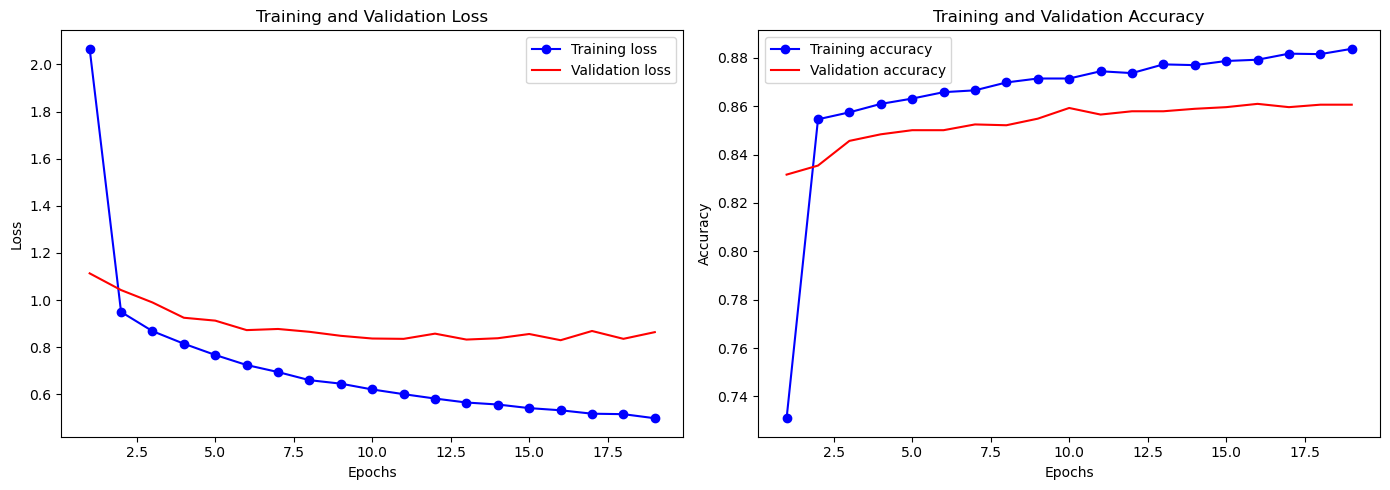

In [61]:
import matplotlib.pyplot as plt
# Extract metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot Training & Validation Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [62]:
from tensorflow.keras.models import load_model, save_model
# Save model weights to HDF5
# Save the model in HDF5 format
model1.save('ANN_G.h5')

/home/mke37/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
# Evaluation using ANN model
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = model1.predict(x_test)
true_labels = feature_df_q['label']
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions.argmax(axis=1))
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)



92/92 [==============================] - 1s 4ms/step
Confusion Matrix:
[[   0    0    0 ...    0    0    2]
 [   0    4    0 ...    0    0    0]
 [   0    0    0 ...    0    0   15]
 ...
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0    7]
 [   0    0    0 ...    0    0 2356]]
Accuracy: 0.8609316558993539


In [64]:
from sklearn.metrics import classification_report
classification_report=classification_report(true_labels, predictions.argmax(axis=1))
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00        15
           4       0.67      0.20      0.31        10
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         5
          10       0.65      0.73      0.69        15
          11       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         1
          15       0.36      0.22      0.28        18
          16       0.50      0.64      0.56        11
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         4
          20       0.27      0.75      0.40         4
          21       0.73      0.90      0.81        42
          23       1.00    

/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/

In [65]:
# Assuming distances_df is your DataFrame with 'actual_label' and 'predictions' columns
y_true = feature_df_q['label']
y_pred = predictions.argmax(axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Aggregate TP, FP, FN
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP

# Calculate Micro F1 Score
micro_F1_score = 2 * TP.sum() / ((2 * TP.sum()) + FP.sum() + FN.sum())

print("Micro F1 Score:", micro_F1_score)

Confusion Matrix:
 [[   0    0    0 ...    0    0    2]
 [   0    4    0 ...    0    0    0]
 [   0    0    0 ...    0    0   15]
 ...
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0    7]
 [   0    0    0 ...    0    0 2356]]
Micro F1 Score: 0.8609316558993539


In [66]:
report_lines = classification_report.strip().split('\n')
class_names = [line.split()[0] for line in report_lines[2:-5]]  # Extract class names
f1_scores = [float(line.split()[3]) for line in report_lines[2:-5]]  # Extract F1 scores

# Calculate the average F1 score
average_f1_score = sum(f1_scores) / len(f1_scores)

print("Average F1 Score:", average_f1_score)

Average F1 Score: 0.17168316831683172


In [67]:
f1_scores

# Script for testing 

In [68]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from camel_tools.tokenizers.word import simple_word_tokenize
import gensim


In [70]:
model = gensim.models.Word2Vec.load("../../../OLD/w2v_CBOW_300_3_400_10.model")
model_with_attention_bi_lstm = load_model('model_G_with_attention_bi_lstm.h5')
model_with_attention_rnn = load_model('model_G_with_attention_rnn.h5')
model_with_attention_gru = load_model('model_G_with_attention_gru.h5')

In [71]:
# Load the label encoder
with open('label_G_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

## **prediction using ANN model**

In [72]:
from tensorflow.keras.models import load_model
classification_model = load_model('ANN_G.h5')

In [73]:
def classify_word(sentence, model, model_with_attention_gru, model_with_attention_bi_lstm, model_with_attention_rnn, classification_model, label_encoder):
    
    # Tokenize the sentence
    sentence = simple_word_tokenize(sentence)
    
    # Extract features for the sentence
    word_embeddings = []
    for word in sentence:
        if word in model.wv:
            word_embedding = model.wv[word]
        else:
            word_embedding = np.zeros(model.vector_size)
        word_embeddings.append(word_embedding)  # Always append, either the embedding or a zero vector
    
    # If word_embeddings is empty, return an empty list
    if not word_embeddings:
        return []
    
    max_length = 134
    # Define maximum length and apply padding
    padded_sentence = np.zeros((1, max_length, model.vector_size))
    padded_sentence[0, :len(word_embeddings)] = word_embeddings[:max_length]  # Truncate if longer than max_length

    # Predict features using different models
    q_sentence_features_gru = model_with_attention_gru.predict(padded_sentence)
    q_sentence_features_bi_lstm = model_with_attention_bi_lstm.predict(padded_sentence)
    q_sentence_features_rnn = model_with_attention_rnn.predict(padded_sentence)
    
    actual_length = min(len(word_embeddings), max_length)
    
    # Extract and truncate features to the original sentence length
    f = pd.DataFrame(q_sentence_features_gru[0][:actual_length])
    f2 = pd.DataFrame(q_sentence_features_bi_lstm[0][:actual_length])
    f3 = pd.DataFrame(q_sentence_features_rnn[0][:actual_length])
    
    # Flatten and concatenate features from different models
    features_df = pd.concat([f, f2, f3], axis=1, ignore_index=True)
    
    features_df['word'] = sentence[:actual_length]
    
    # Extract words from the DataFrame
    words = features_df['word'].tolist()
    
    # Prepare feature data for classification
    feature_data = features_df.drop(columns = ['word'])
    
    # Classify using the pretrained model
    predictions = classification_model.predict(feature_data)
    
    # Get the predicted label indices
    predicted_label_indices = np.argmax(predictions, axis=1)
    
    # Transform the label indices to the actual labels
    predicted_labels = label_encoder.inverse_transform(predicted_label_indices)

    # Print the predictions
    for word, label in zip(words, predicted_labels):
        print(f"Prediction for '{word}' -----------> {label}")

In [74]:
Arabic_sentence = "ثنائي أكسيد الكربون أو كما يعرف بالاسم الشائع ثاني أكسيد الكربون هو مركب كيميائي من  الأكسجين الكربون له الصيغة الكيميائية 2."
classify_word(
    Arabic_sentence, 
    model, 
    model_with_attention_gru, 
    model_with_attention_bi_lstm, 
    model_with_attention_rnn, 
    classification_model, 
    label_encoder
)

1/1 [==============================] - 1s 712ms/step


W0000 00:00:1724526825.712742   14790 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "AuthenticAMD" model: "241" frequency: 1996 num_cores: 1 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 524288 l3_cache_size: 67108864 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


1/1 [==============================] - 1s 736ms/step


W0000 00:00:1724526826.502400   14790 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "AuthenticAMD" model: "241" frequency: 1996 num_cores: 1 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 524288 l3_cache_size: 67108864 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


1/1 [==============================] - 0s 111ms/step
Prediction for 'ثنائي' -----------> OUTSIDE
Prediction for 'أكسيد' -----------> OUTSIDE
Prediction for 'الكربون' -----------> B-Chemical_Thing
Prediction for 'أو' -----------> OUTSIDE
Prediction for 'كما' -----------> OUTSIDE
Prediction for 'يعرف' -----------> OUTSIDE
Prediction for 'بالاسم' -----------> OUTSIDE
Prediction for 'الشائع' -----------> OUTSIDE
Prediction for 'ثاني' -----------> OUTSIDE
Prediction for 'أكسيد' -----------> OUTSIDE
Prediction for 'الكربون' -----------> B-Chemical_Thing
Prediction for 'هو' -----------> OUTSIDE
Prediction for 'مركب' -----------> OUTSIDE
Prediction for 'كيميائي' -----------> OUTSIDE
Prediction for 'من' -----------> OUTSIDE
Prediction for 'الأكسجين' -----------> OUTSIDE
Prediction for 'الكربون' -----------> B-Chemical_Thing
Prediction for 'له' -----------> OUTSIDE
Prediction for 'الصيغة' -----------> OUTSIDE
Prediction for 'الكيميائية' -----------> OUTSIDE
Prediction for '2' -----------> OUTSID

In [75]:
def classify_word(sentence, model, model_with_attention_gru, model_with_attention_bi_lstm, model_with_attention_rnn, classification_model, label_encoder):
    
    # Extract features for the sentence
    word_embeddings = []
    for word in sentence:
        if word in model.wv:
            word_embedding = model.wv[word]
        else:
            word_embedding = np.zeros(model.vector_size)
        word_embeddings.append(word_embedding)  # Always append, either the embedding or a zero vector
    
    # If word_embeddings is empty, return an empty list
    if not word_embeddings:
        return []
    max_length = 134
    # Define maximum length and apply padding
    padded_sentence = np.zeros((1, max_length, model.vector_size))
    padded_sentence[0, :len(word_embeddings)] = word_embeddings[:max_length]  # Truncate if longer than max_length

    # Predict features using different models
    q_sentence_features_gru = model_with_attention_gru.predict(padded_sentence)
    q_sentence_features_bi_lstm = model_with_attention_bi_lstm.predict(padded_sentence)
    q_sentence_features_rnn = model_with_attention_rnn.predict(padded_sentence)
    
    actual_length = min(len(word_embeddings), max_length)
    
    # Extract and truncate features to the original sentence length
    f = pd.DataFrame(q_sentence_features_gru[0][:actual_length])
    f2 = pd.DataFrame(q_sentence_features_bi_lstm[0][:actual_length])
    f3 = pd.DataFrame(q_sentence_features_rnn[0][:actual_length])
    
    # Flatten and concatenate features from different models
    features_df = pd.concat([f, f2, f3], axis=1, ignore_index=True)
    
    features_df['word'] = sentence[:actual_length]
    
    # Extract words from the DataFrame
    words = features_df['word'].tolist()
    
    # Prepare feature data for classification
    feature_data = features_df.drop(columns = ['word'])
    
    # Classify using the pretrained model
    predictions = classification_model.predict(feature_data)
    
    # Get the predicted label indices
    predicted_label_indices = np.argmax(predictions, axis=1)
    
    # Transform the label indices to the actual labels
    predicted_labels = label_encoder.inverse_transform(predicted_label_indices)
    
    return predicted_labels

In [77]:
sentences = []
labels = []

curr_sentence = []
curr_labels = []

# Use the correct encoding for reading the file
with open("../../../Dataset/TestingData.txt", "r", encoding='utf-8') as file:
    for line in file:
        if line.strip():  # Checks if the line is not empty or contains only whitespace
            label = line.split()[0]
            word = line.split()[1]
            
            curr_sentence.append(word)
            curr_labels.append(label)
            if word == '.':
                sentences.append(curr_sentence)
                labels.append(curr_labels)
                curr_sentence = []
                curr_labels = []

# Append the last sentence and labels if file doesn't end with a newline
if curr_sentence and curr_labels:
    sentences.append(curr_sentence)
    labels.append(curr_labels)

print("DONE!")           

DONE!


In [78]:
num_of_labels = 0
for sublist in labels:
    num_of_labels += len(sublist)
print(num_of_labels)

21199


In [79]:
labelsPredictedArray = []

for i in range(len(sentences)):
    # Join the sentence into a string and pass it to the classify_word function
    predicted_labels = classify_word(
        sentence=(sentences[i]), 
        model=model, 
        model_with_attention_gru=model_with_attention_gru, 
        model_with_attention_bi_lstm=model_with_attention_bi_lstm, 
        model_with_attention_rnn=model_with_attention_rnn, 
        classification_model=classification_model, 
        label_encoder=label_encoder
    )
    
    # Append the predicted labels to the labelsPredictedArray
    labelsPredictedArray.append(predicted_labels)
    
    # Print progress every 100 sentences
    if i % 100 == 0:
        print(round((i/len(sentences)) * 100, 2), "%")

print("100 %")


1/1 [==============================] - 0s 22ms/step
0.0 %
1/1 [==============================] - 0s 22ms/step
11.68 %
1/1 [==============================] - 0s 23ms/step
23.36 %
1/1 [==============================] - 0s 23ms/step
35.05 %
1/1 [==============================] - 0s 23ms/step
46.73 %
1/1 [==============================] - 0s 24ms/step
58.41 %
1/1 [==============================] - 0s 22ms/step
70.09 %
1/1 [==============================] - 0s 24ms/step
81.78 %
2/2 [==============================] - 0s 5ms/step
93.46 %
1/1 [==============================] - 0s 24ms/step
100 %


In [80]:
len(labelsPredictedArray)

856

In [81]:
num_of_labels_predicted = 0
for sublist in labelsPredictedArray:
    num_of_labels_predicted += len(sublist)
print(num_of_labels_predicted)

21199


In [83]:
# index = 1
# print(labels[index])
# print()
# print(labelsPredictedArray[index])

In [84]:
actual_labels = []
for sublist in labels:
    for labl in sublist:
        actual_labels.append(labl)
# actual_labels

In [85]:
predicted_labels = []
for sublist in labelsPredictedArray:
    for labl in sublist:
        predicted_labels.append(labl)
# predicted_labels

In [87]:
ann_new_actual_labels = []

for i in range(0, len(actual_labels)):
    lbl = actual_labels[i]
    
    if lbl != "OUTSIDE":
        if lbl[2:] == "Actor" or lbl[2:] == "Architect" or lbl[2:] == "Artist" or lbl[2:] == "Athlete" or lbl[2:] == "Author" or lbl[2:] == "Coach" or lbl[2:] == "Director" or lbl[2:] == "Doctor" or lbl[2:] == "Engineer" or lbl[2:] == "Monarch" or lbl[2:] == "Musician" or lbl[2:] == "Politician" or lbl[2:] == "Religious_Leader" or lbl[2:] == "Soldier" or lbl[2:] == "Terrorist":
            ann_new_actual_labels.append("Person")
        elif lbl[2:] == "City" or lbl[2:] == "Country" or lbl[2:] == "County" or lbl[2:] == "Province" or lbl[2:] == "Railway" or lbl[2:] == "Road" or lbl[2:] == "Bridge" or lbl[2:] == "Body_Of_Water" or lbl[2:] == "Island" or lbl[2:] == "Mountain" or lbl[2:] == "Glacier" or lbl[2:] == "Astral_Body" or lbl[2:] == "Cemetery" or lbl[2:] == "Park":
            ann_new_actual_labels.append("Location")
        elif lbl[2:] == "Airport" or lbl[2:] == "Dam" or lbl[2:] == "Hospital" or lbl[2:] == "Hotel" or lbl[2:] == "Library" or lbl[2:] == "Power_Station" or lbl[2:] == "Restaurant" or lbl[2:] == "Sports_Facility" or lbl[2:] == "Theater":
            ann_new_actual_labels.append("Building")
        elif lbl[2:] == "Airline" or lbl[2:] == "Company" or lbl[2:] == "Educational_Institution" or lbl[2:] == "Sports_League" or lbl[2:] == "Sports_Team" or lbl[2:] == "Terrorist_Organization" or lbl[2:] == "Government_Agency" or lbl[2:] == "Government" or lbl[2:] == "Political_Party" or lbl[2:] == "Educational_Department" or lbl[2:] == "Military" or lbl[2:] == "News_Agency":
            ann_new_actual_labels.append("Organization")
        elif lbl[2:] == "Engine" or lbl[2:] == "Airplane" or lbl[2:] == "Car" or lbl[2:] == "Ship" or lbl[2:] == "Spacecraft" or lbl[2:] == "Train" or lbl[2:] == "Camera" or lbl[2:] == "Mobile_Phone" or lbl[2:] == "Computer" or lbl[2:] == "Software" or lbl[2:] == "Game" or lbl[2:] == "Instrument" or lbl[2:] == "Weapon":
            ann_new_actual_labels.append("Product")
        elif lbl[2:] == "Film" or lbl[2:] == "Play" or lbl[2:] == "Written_Work" or lbl[2:] == "Newspaper" or lbl[2:] == "Music":
            ann_new_actual_labels.append("Art")
        elif lbl[2:] == "Attack" or lbl[2:] == "Election" or lbl[2:] == "Protest" or lbl[2:] == "Military_Conflict" or lbl[2:] == "Natural_Disaster" or lbl[2:] == "Sports_Event" or lbl[2:] == "Terrorist_Attack":
            ann_new_actual_labels.append("Event")
        elif lbl[2:] == "Time" or lbl[2:] == "Color" or lbl[2:] == "Award" or lbl[2:] == "Educational_Degree" or lbl[2:] == "Title" or lbl[2:] == "Law" or lbl[2:] == "Ethnicity" or lbl[2:] == "Language" or lbl[2:] == "Religion" or lbl[2:] == "God" or lbl[2:] == "Chemical_Thing" or lbl[2:] == "Biological_Thing" or lbl[2:] == "Medical_Treatment" or lbl[2:] == "Disease" or lbl[2:] == "Symptom" or lbl[2:] == "Drug" or lbl[2:] == "Body_Part" or lbl[2:] == "Living_Thing" or lbl[2:] == "Animal" or lbl[2:] == "Food" or lbl[2:] == "Website" or lbl[2:] == "Broadcast_Network" or lbl[2:] == "Broadcast_Program" or lbl[2:] == "Tv_Channel" or lbl[2:] == "Currency" or lbl[2:] == "Stock_Exchange" or lbl[2:] == "Algorithm" or lbl[2:] == "Programming_Language" or lbl[2:] == "Transit_System" or lbl[2:] == "Transit_Line":
            ann_new_actual_labels.append("Other")
        elif lbl[2:] == "Date":
            ann_new_actual_labels.append("Date")
        elif lbl[2:] == "Nationality":
            ann_new_actual_labels.append("Nationality")
    else:
        ann_new_actual_labels.append("OUTSIDE")
            
print("DONE")

DONE


In [88]:
ann_new_predicted_labels = []

for i in range(0, len(predicted_labels)):
    lbl = predicted_labels[i]
    
    if lbl != "OUTSIDE":
        if lbl[2:] == "Actor" or lbl[2:] == "Architect" or lbl[2:] == "Artist" or lbl[2:] == "Athlete" or lbl[2:] == "Author" or lbl[2:] == "Coach" or lbl[2:] == "Director" or lbl[2:] == "Doctor" or lbl[2:] == "Engineer" or lbl[2:] == "Monarch" or lbl[2:] == "Musician" or lbl[2:] == "Politician" or lbl[2:] == "Religious_Leader" or lbl[2:] == "Soldier" or lbl[2:] == "Terrorist":
            ann_new_predicted_labels.append("Person")
        elif lbl[2:] == "City" or lbl[2:] == "Country" or lbl[2:] == "County" or lbl[2:] == "Province" or lbl[2:] == "Railway" or lbl[2:] == "Road" or lbl[2:] == "Bridge" or lbl[2:] == "Body_Of_Water" or lbl[2:] == "Island" or lbl[2:] == "Mountain" or lbl[2:] == "Glacier" or lbl[2:] == "Astral_Body" or lbl[2:] == "Cemetery" or lbl[2:] == "Park":
            ann_new_predicted_labels.append("Location")
        elif lbl[2:] == "Airport" or lbl[2:] == "Dam" or lbl[2:] == "Hospital" or lbl[2:] == "Hotel" or lbl[2:] == "Library" or lbl[2:] == "Power_Station" or lbl[2:] == "Restaurant" or lbl[2:] == "Sports_Facility" or lbl[2:] == "Theater":
            ann_new_predicted_labels.append("Building")
        elif lbl[2:] == "Airline" or lbl[2:] == "Company" or lbl[2:] == "Educational_Institution" or lbl[2:] == "Sports_League" or lbl[2:] == "Sports_Team" or lbl[2:] == "Terrorist_Organization" or lbl[2:] == "Government_Agency" or lbl[2:] == "Government" or lbl[2:] == "Political_Party" or lbl[2:] == "Educational_Department" or lbl[2:] == "Military" or lbl[2:] == "News_Agency":
            ann_new_predicted_labels.append("Organization")
        elif lbl[2:] == "Engine" or lbl[2:] == "Airplane" or lbl[2:] == "Car" or lbl[2:] == "Ship" or lbl[2:] == "Spacecraft" or lbl[2:] == "Train" or lbl[2:] == "Camera" or lbl[2:] == "Mobile_Phone" or lbl[2:] == "Computer" or lbl[2:] == "Software" or lbl[2:] == "Game" or lbl[2:] == "Instrument" or lbl[2:] == "Weapon":
            ann_new_predicted_labels.append("Product")
        elif lbl[2:] == "Film" or lbl[2:] == "Play" or lbl[2:] == "Written_Work" or lbl[2:] == "Newspaper" or lbl[2:] == "Music":
            ann_new_predicted_labels.append("Art")
        elif lbl[2:] == "Attack" or lbl[2:] == "Election" or lbl[2:] == "Protest" or lbl[2:] == "Military_Conflict" or lbl[2:] == "Natural_Disaster" or lbl[2:] == "Sports_Event" or lbl[2:] == "Terrorist_Attack":
            ann_new_predicted_labels.append("Event")
        elif lbl[2:] == "Time" or lbl[2:] == "Color" or lbl[2:] == "Award" or lbl[2:] == "Educational_Degree" or lbl[2:] == "Title" or lbl[2:] == "Law" or lbl[2:] == "Ethnicity" or lbl[2:] == "Language" or lbl[2:] == "Religion" or lbl[2:] == "God" or lbl[2:] == "Chemical_Thing" or lbl[2:] == "Biological_Thing" or lbl[2:] == "Medical_Treatment" or lbl[2:] == "Disease" or lbl[2:] == "Symptom" or lbl[2:] == "Drug" or lbl[2:] == "Body_Part" or lbl[2:] == "Living_Thing" or lbl[2:] == "Animal" or lbl[2:] == "Food" or lbl[2:] == "Website" or lbl[2:] == "Broadcast_Network" or lbl[2:] == "Broadcast_Program" or lbl[2:] == "Tv_Channel" or lbl[2:] == "Currency" or lbl[2:] == "Stock_Exchange" or lbl[2:] == "Algorithm" or lbl[2:] == "Programming_Language" or lbl[2:] == "Transit_System" or lbl[2:] == "Transit_Line":
            ann_new_predicted_labels.append("Other")
        elif lbl[2:] == "Date":
            ann_new_predicted_labels.append("Date")
        elif lbl[2:] == "Nationality":
            ann_new_predicted_labels.append("Nationality")
    else:
        ann_new_predicted_labels.append("OUTSIDE")
            
print("DONE")

DONE


In [89]:
print(len(actual_labels), len(ann_new_actual_labels))
print(len(predicted_labels), len(ann_new_predicted_labels))

21199 21199
21199 21199


In [90]:
print(classification_report(ann_new_actual_labels, ann_new_predicted_labels))

              precision    recall  f1-score   support

         Art       0.40      0.03      0.06       121
    Building       1.00      0.06      0.11        70
        Date       0.72      0.28      0.41       474
       Event       0.81      0.27      0.40        94
    Location       0.82      0.37      0.51       584
 Nationality       0.78      0.05      0.10       136
     OUTSIDE       0.85      0.99      0.92     17531
Organization       0.55      0.06      0.10       295
       Other       0.65      0.07      0.12      1377
      Person       0.60      0.14      0.23       223
     Product       0.97      0.12      0.22       294

    accuracy                           0.85     21199
   macro avg       0.74      0.22      0.29     21199
weighted avg       0.83      0.85      0.80     21199



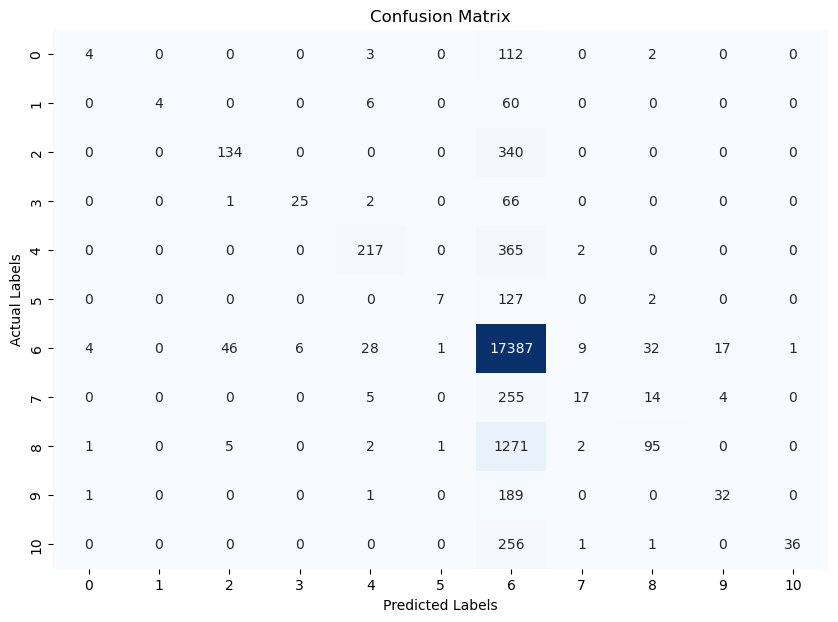

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(ann_new_actual_labels, ann_new_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [86]:
from sklearn.metrics import classification_report

print(classification_report(actual_labels, predicted_labels))

                           precision    recall  f1-score   support

                  B-Actor       0.00      0.00      0.00         2
                B-Airline       0.00      0.00      0.00         5
               B-Airplane       0.00      0.00      0.00        18
                B-Airport       1.00      1.00      1.00         4
              B-Algorithm       0.00      0.00      0.00         6
                 B-Animal       0.60      0.02      0.04       130
              B-Architect       0.00      0.00      0.00         2
                 B-Artist       1.00      0.07      0.13        14
                B-Athlete       0.00      0.00      0.00         0
                 B-Attack       0.00      0.00      0.00         7
                 B-Author       0.00      0.00      0.00        25
                  B-Award       0.00      0.00      0.00        17
       B-Biological_Thing       1.00      0.02      0.04        47
          B-Body_Of_Water       0.55      0.58      0.56     

## **Prediction using FEW SHOT LEARNING**

In [92]:
# Load the class centroids
means_by_class = pd.read_csv('means_G_by_class.csv')

In [93]:
# Set 'label' column as the index
means_by_class.set_index('label', inplace=True)

In [94]:
def classify_word(sentence, model, model_with_attention_gru, model_with_attention_bi_lstm, model_with_attention_rnn, label_encoder, means_by_class):
    
    # Tokenize the sentence
    sentence = simple_word_tokenize(sentence)
    
    # Extract features for the sentence
    word_embeddings = []
    for word in sentence:
        if word in model.wv:
            word_embedding = model.wv[word]
        else:
            word_embedding = np.zeros(model.vector_size)
        word_embeddings.append(word_embedding)  # Always append, either the embedding or a zero vector
    
    # If word_embeddings is empty, return an empty list
    if not word_embeddings:
        return []
    max_length = 134
    # Define maximum length and apply padding
    padded_sentence = np.zeros((1, max_length, model.vector_size))
    padded_sentence[0, :len(word_embeddings)] = word_embeddings[:max_length]  # Truncate if longer than max_length

    # Predict features using different models
    q_sentence_features_gru = model_with_attention_gru.predict(padded_sentence)
    q_sentence_features_bi_lstm = model_with_attention_bi_lstm.predict(padded_sentence)
    q_sentence_features_rnn = model_with_attention_rnn.predict(padded_sentence)
    
    actual_length = min(len(word_embeddings), max_length)
    
    # Extract and truncate features to the original sentence length
    f = pd.DataFrame(q_sentence_features_gru[0][:actual_length])
    f2 = pd.DataFrame(q_sentence_features_bi_lstm[0][:actual_length])
    f3 = pd.DataFrame(q_sentence_features_rnn[0][:actual_length])
    
    # Flatten and concatenate features from different models
    features_df = pd.concat([f, f2, f3], axis=1, ignore_index=True)
    
    features_df['word'] = sentence[:actual_length]
    
    # Calculate distances to centroids
    distances_df = pd.DataFrame()
    
    for label, centroid in means_by_class.iterrows():
        dist = []
        
        for _, feature in features_df.drop(columns = ['word']).iterrows():
            distance = np.linalg.norm(feature.values - centroid.values)
            dist.append(distance)
        distances_df[label] = dist
    
    # Get predictions
    predictions = distances_df.idxmin(axis=1).astype(int)
    predicted_labels = label_encoder.inverse_transform(predictions)
    
    word_list = features_df['word'].tolist()
    
    # Print predictions
    for word, label in zip(word_list, predicted_labels):
        print(f"Prediction for word '{word}' -----------> {label}")
    
    # Visualize feature vectors and centroids
    pca = PCA(n_components=2)
    feature_pca = pca.fit_transform(features_df.drop(columns = ['word']))
    centroid_pca = pca.transform(means_by_class)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(feature_pca[:, 0], feature_pca[:, 1], c='blue', label='Feature Vectors')
    plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], c='red', marker='x', label='Centroids')
    plt.legend()
    plt.title('Feature Vectors and Centroids Visualization')
    plt.show()
    
    return predicted_labels


1/1 [==============================] - 0s 33ms/step
Prediction for word 'ثنائي' -----------> I-Film
Prediction for word 'أكسيد' -----------> I-Film
Prediction for word 'الكربون' -----------> I-Chemical_Thing
Prediction for word 'أو' -----------> OUTSIDE
Prediction for word 'كما' -----------> OUTSIDE
Prediction for word 'يعرف' -----------> B-Artist
Prediction for word 'بالاسم' -----------> B-Title
Prediction for word 'الشائع' -----------> B-Title
Prediction for word 'ثاني' -----------> B-Chemical_Thing
Prediction for word 'أكسيد' -----------> I-Film
Prediction for word 'الكربون' -----------> I-Chemical_Thing
Prediction for word 'هو' -----------> OUTSIDE
Prediction for word 'مركب' -----------> I-Airplane
Prediction for word 'كيميائي' -----------> OUTSIDE
Prediction for word 'من' -----------> OUTSIDE
Prediction for word 'الأكسجين' -----------> OUTSIDE
Prediction for word 'الكربون' -----------> I-Chemical_Thing
Prediction for word 'له' -----------> B-Body_Part
Prediction for word 'الصيغة' 

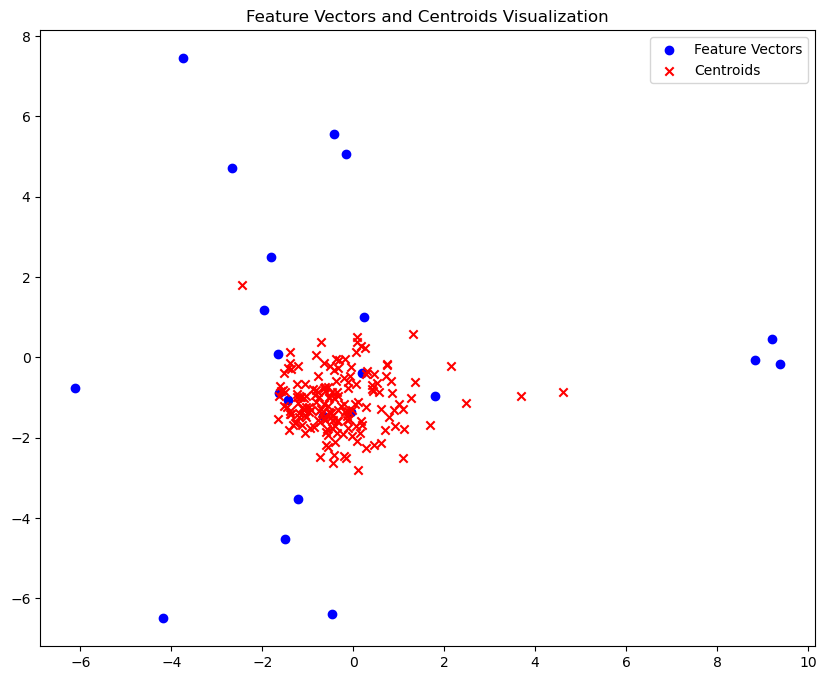

array(['I-Film', 'I-Film', 'I-Chemical_Thing', 'OUTSIDE', 'OUTSIDE',
       'B-Artist', 'B-Title', 'B-Title', 'B-Chemical_Thing', 'I-Film',
       'I-Chemical_Thing', 'OUTSIDE', 'I-Airplane', 'OUTSIDE', 'OUTSIDE',
       'OUTSIDE', 'I-Chemical_Thing', 'B-Body_Part', 'OUTSIDE', 'I-Film',
       'OUTSIDE', 'OUTSIDE'], dtype=object)

In [95]:
Arabic_sentence = "ثنائي أكسيد الكربون أو كما يعرف بالاسم الشائع ثاني أكسيد الكربون هو مركب كيميائي من  الأكسجين الكربون له الصيغة الكيميائية 2."
classify_word(
    Arabic_sentence, 
    model, 
    model_with_attention_gru, 
    model_with_attention_bi_lstm, 
    model_with_attention_rnn,  
    label_encoder,
    means_by_class
)

In [96]:
def classify_word(sentence, model, model_with_attention_gru, model_with_attention_bi_lstm, model_with_attention_rnn, label_encoder, means_by_class):
    
    # Extract features for the sentence
    word_embeddings = []
    for word in sentence:
        if word in model.wv:
            word_embedding = model.wv[word]
        else:
            word_embedding = np.zeros(model.vector_size)
        word_embeddings.append(word_embedding)  # Always append, either the embedding or a zero vector
    
    # If word_embeddings is empty, return an empty list
    if not word_embeddings:
        return []
    max_length = 134
    # Define maximum length and apply padding
    padded_sentence = np.zeros((1, max_length, model.vector_size))
    padded_sentence[0, :len(word_embeddings)] = word_embeddings[:max_length]  # Truncate if longer than max_length

    # Predict features using different models
    q_sentence_features_gru = model_with_attention_gru.predict(padded_sentence)
    q_sentence_features_bi_lstm = model_with_attention_bi_lstm.predict(padded_sentence)
    q_sentence_features_rnn = model_with_attention_rnn.predict(padded_sentence)
    
    actual_length = min(len(word_embeddings), max_length)
    
    # Extract and truncate features to the original sentence length
    f = pd.DataFrame(q_sentence_features_gru[0][:actual_length])
    f2 = pd.DataFrame(q_sentence_features_bi_lstm[0][:actual_length])
    f3 = pd.DataFrame(q_sentence_features_rnn[0][:actual_length])
    
    # Flatten and concatenate features from different models
    features_df = pd.concat([f, f2, f3], axis=1, ignore_index=True)
    
    features_df['word'] = sentence[:actual_length]
    
    # Calculate distances to centroids
    distances_df = pd.DataFrame()
    
    for label, centroid in means_by_class.iterrows():
        dist = []
        
        for _, feature in features_df.drop(columns = ['word']).iterrows():
            distance = np.linalg.norm(feature.values - centroid.values)
            dist.append(distance)
        distances_df[label] = dist
    
    # Get predictions
    predictions = distances_df.idxmin(axis=1).astype(int)
    predicted_labels = label_encoder.inverse_transform(predictions)
    
    return predicted_labels


In [97]:
labelsPredictedArray = []

for i in range(len(sentences)):
    # Join the sentence into a string and pass it to the classify_word function
    predicted_labels = classify_word(
        sentence=(sentences[i]), 
        model=model, 
        model_with_attention_gru=model_with_attention_gru, 
        model_with_attention_bi_lstm=model_with_attention_bi_lstm, 
        model_with_attention_rnn=model_with_attention_rnn,  
        label_encoder=label_encoder,
        means_by_class = means_by_class
        
    )
    
    # Append the predicted labels to the labelsPredictedArray
    labelsPredictedArray.append(predicted_labels)
    
    # Print progress every 100 sentences
    if i % 100 == 0:
        print(round((i/len(sentences)) * 100, 2), "%")

print("100 %")


1/1 [==============================] - 0s 33ms/step
0.0 %
1/1 [==============================] - 0s 33ms/step
11.68 %
1/1 [==============================] - 0s 32ms/step
23.36 %
1/1 [==============================] - 0s 34ms/step
35.05 %
1/1 [==============================] - 0s 32ms/step
46.73 %
1/1 [==============================] - 0s 32ms/step
58.41 %
1/1 [==============================] - 0s 93ms/step
70.09 %
1/1 [==============================] - 0s 165ms/step
81.78 %
1/1 [==============================] - 0s 115ms/step
93.46 %
1/1 [==============================] - 0s 136ms/step
100 %


In [98]:
predicted_labels = []
for sublist in labelsPredictedArray:
    for labl in sublist:
        predicted_labels.append(labl)
# predicted_labels

In [99]:
index = 1
print(labels[index])
print()
print(labelsPredictedArray[index])

['OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'B-Chemical_Thing', 'I-Chemical_Thing', 'I-Chemical_Thing', 'OUTSIDE', 'OUTSIDE', 'B-Chemical_Thing', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE']

['OUTSIDE' 'B-Symptom' 'I-Title' 'I-Title' 'OUTSIDE' 'I-Title' 'OUTSIDE'
 'OUTSIDE' 'I-Chemical_Thing' 'I-Film' 'B-Chemical_Thing'
 'B-Chemical_Thing' 'B-Symptom' 'B-Animal' 'OUTSIDE' 'OUTSIDE'
 'I-Religion' 'B-Title' 'I-Title' 'B-Written_Work' 'OUTSIDE' 'OUTSIDE'
 'OUTSIDE' 'OUTSIDE' 'I-Title' 'B-Title' 'OUTSIDE' 'B-Food' 'OUTSIDE']


In [100]:
from sklearn.metrics import classification_report

print(classification_report(actual_labels, predicted_labels))

                           precision    recall  f1-score   support

                  B-Actor       0.00      0.00      0.00         2
                B-Airline       0.00      0.00      0.00         5
               B-Airplane       0.00      0.00      0.00        18
                B-Airport       1.00      1.00      1.00         4
              B-Algorithm       0.00      0.00      0.00         6
                 B-Animal       0.34      0.27      0.30       130
              B-Architect       0.00      0.00      0.00         2
                 B-Artist       0.03      0.07      0.04        14
                B-Athlete       0.00      0.00      0.00         0
                 B-Attack       0.12      0.29      0.17         7
                 B-Author       0.00      0.00      0.00        25
                  B-Award       0.00      0.00      0.00        17
       B-Biological_Thing       0.60      0.06      0.12        47
          B-Body_Of_Water       0.72      0.67      0.69     

In [101]:
def trimLabels(labels):
    
    new_labels = []

    for i in range(0, len(labels)):
        lbl = labels[i]

        if lbl != "OUTSIDE":
            if lbl[2:] == "Actor" or lbl[2:] == "Architect" or lbl[2:] == "Artist" or lbl[2:] == "Athlete" or lbl[2:] == "Author" or lbl[2:] == "Coach" or lbl[2:] == "Director" or lbl[2:] == "Doctor" or lbl[2:] == "Engineer" or lbl[2:] == "Monarch" or lbl[2:] == "Musician" or lbl[2:] == "Politician" or lbl[2:] == "Religious_Leader" or lbl[2:] == "Soldier" or lbl[2:] == "Terrorist":
                new_labels.append("Person")
            elif lbl[2:] == "City" or lbl[2:] == "Country" or lbl[2:] == "County" or lbl[2:] == "Province" or lbl[2:] == "Railway" or lbl[2:] == "Road" or lbl[2:] == "Bridge" or lbl[2:] == "Body_Of_Water" or lbl[2:] == "Island" or lbl[2:] == "Mountain" or lbl[2:] == "Glacier" or lbl[2:] == "Astral_Body" or lbl[2:] == "Cemetery" or lbl[2:] == "Park":
                new_labels.append("Location")
            elif lbl[2:] == "Airport" or lbl[2:] == "Dam" or lbl[2:] == "Hospital" or lbl[2:] == "Hotel" or lbl[2:] == "Library" or lbl[2:] == "Power_Station" or lbl[2:] == "Restaurant" or lbl[2:] == "Sports_Facility" or lbl[2:] == "Theater":
                new_labels.append("Building")
            elif lbl[2:] == "Airline" or lbl[2:] == "Company" or lbl[2:] == "Educational_Institution" or lbl[2:] == "Sports_League" or lbl[2:] == "Sports_Team" or lbl[2:] == "Terrorist_Organization" or lbl[2:] == "Government_Agency" or lbl[2:] == "Government" or lbl[2:] == "Political_Party" or lbl[2:] == "Educational_Department" or lbl[2:] == "Military" or lbl[2:] == "News_Agency":
                new_labels.append("Organization")
            elif lbl[2:] == "Engine" or lbl[2:] == "Airplane" or lbl[2:] == "Car" or lbl[2:] == "Ship" or lbl[2:] == "Spacecraft" or lbl[2:] == "Train" or lbl[2:] == "Camera" or lbl[2:] == "Mobile_Phone" or lbl[2:] == "Computer" or lbl[2:] == "Software" or lbl[2:] == "Game" or lbl[2:] == "Instrument" or lbl[2:] == "Weapon":
                new_labels.append("Product")
            elif lbl[2:] == "Film" or lbl[2:] == "Play" or lbl[2:] == "Written_Work" or lbl[2:] == "Newspaper" or lbl[2:] == "Music":
                new_labels.append("Art")
            elif lbl[2:] == "Attack" or lbl[2:] == "Election" or lbl[2:] == "Protest" or lbl[2:] == "Military_Conflict" or lbl[2:] == "Natural_Disaster" or lbl[2:] == "Sports_Event" or lbl[2:] == "Terrorist_Attack":
                new_labels.append("Event")
            elif lbl[2:] == "Time" or lbl[2:] == "Color" or lbl[2:] == "Award" or lbl[2:] == "Educational_Degree" or lbl[2:] == "Title" or lbl[2:] == "Law" or lbl[2:] == "Ethnicity" or lbl[2:] == "Language" or lbl[2:] == "Religion" or lbl[2:] == "God" or lbl[2:] == "Chemical_Thing" or lbl[2:] == "Biological_Thing" or lbl[2:] == "Medical_Treatment" or lbl[2:] == "Disease" or lbl[2:] == "Symptom" or lbl[2:] == "Drug" or lbl[2:] == "Body_Part" or lbl[2:] == "Living_Thing" or lbl[2:] == "Animal" or lbl[2:] == "Food" or lbl[2:] == "Website" or lbl[2:] == "Broadcast_Network" or lbl[2:] == "Broadcast_Program" or lbl[2:] == "Tv_Channel" or lbl[2:] == "Currency" or lbl[2:] == "Stock_Exchange" or lbl[2:] == "Algorithm" or lbl[2:] == "Programming_Language" or lbl[2:] == "Transit_System" or lbl[2:] == "Transit_Line":
                new_labels.append("Other")
            elif lbl[2:] == "Date":
                new_labels.append("Date")
            elif lbl[2:] == "Nationality":
                new_labels.append("Nationality")
        else:
            new_labels.append("OUTSIDE")
            
    return new_labels

FSL_new_actual_labels = trimLabels(actual_labels)
FSL_new_predicted_labels = trimLabels(predicted_labels)
            
print("DONE")

DONE


In [103]:
print(len(actual_labels), len(FSL_new_actual_labels))
print(len(predicted_labels), len(FSL_new_predicted_labels))

21199 21199
21199 21199


In [105]:
print(classification_report(FSL_new_actual_labels, FSL_new_predicted_labels))

              precision    recall  f1-score   support

         Art       0.02      0.39      0.04       121
    Building       0.07      0.23      0.11        70
        Date       0.63      0.26      0.37       474
       Event       0.13      0.34      0.19        94
    Location       0.30      0.36      0.33       584
 Nationality       0.26      0.10      0.15       136
     OUTSIDE       0.88      0.62      0.73     17531
Organization       0.10      0.25      0.14       295
       Other       0.15      0.37      0.21      1377
      Person       0.13      0.32      0.19       223
     Product       0.23      0.19      0.21       294

    accuracy                           0.57     21199
   macro avg       0.26      0.31      0.24     21199
weighted avg       0.77      0.57      0.64     21199



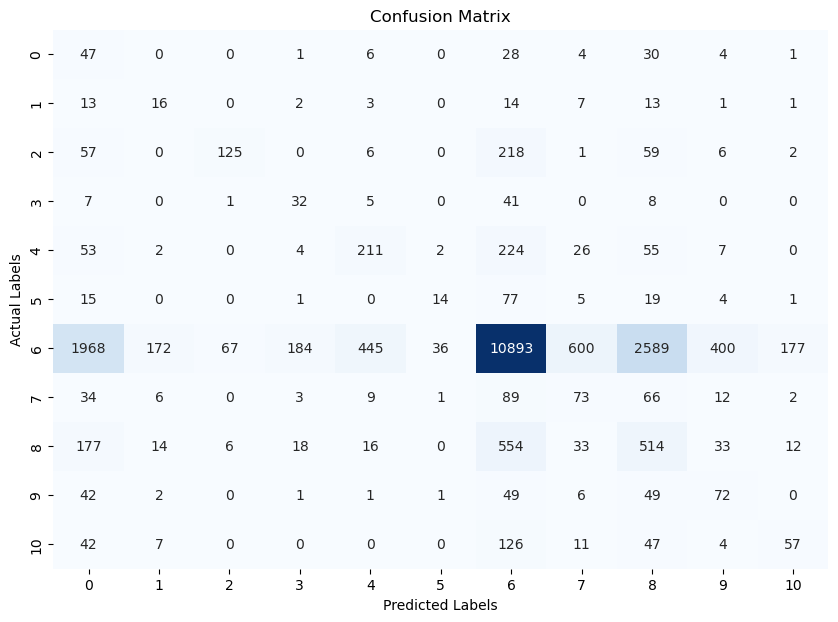

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(FSL_new_actual_labels, FSL_new_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()
